In [3]:
import requests
import pandas as pd

# locate your own client id and client secret at https://developer.spotify.com/dashboard/
CLIENT_ID = '8328ea1f351f48aa9d9e5554e5b651f8' # Client ID
CLIENT_SECRET = '0412f6c6bdfc4886997a2df5ccc656c4' # Client secret 
playlist_id = '7MIOJj0OW0dT9gK4Ph4HBy'

# post request and save access token
auth_response = requests.post('https://accounts.spotify.com/api/token', 
    {'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET}).json()
access_token = auth_response['access_token']
print("access token" + access_token)
HEADERS = {'Authorization': 'Bearer {token}'.format(token=access_token)}

# base URL of all Spotify API endpoints
BASE_URL = 'https://api.spotify.com/v1/'

def get_playlist_data(playlist_id):
    """ Given playlist_id, returns a pandas dataframe
        containing information on each track.
    """
    print("playlist id" + playlist_id)
    playlist_length = 50
    data = [] # will contain info about the tracks on the playlist
    counter = 0 # number of tracks appended to data

    while counter < playlist_length:
        limit = min(50, playlist_length-counter)
        print("counter at", counter)
        playlist = requests.get(BASE_URL + 'playlists/' + playlist_id + '/tracks',
                                headers=HEADERS,
                                params={'limit': limit, 'offset': counter}).json()
        if counter == 0:
            playlist_length = playlist['total']
        counter = min(counter+50, playlist_length) # update counter
    
        for item in playlist['items']:
            track_id = item['track']['id']
            # get each track's audio features
            audio = requests.get(BASE_URL + 'audio-features/' + track_id,
                                 headers=HEADERS).json()
            # get each track's name, artists, genres, popularity, explicit
            track = requests.get(BASE_URL + 'tracks/' + track_id,
                                 headers=HEADERS).json()
            artists = []
            genres = []
            for artist in track['artists']:
                artist_id = artist['id']
                artist_genres = requests.get(BASE_URL + 'artists/' + artist_id,
                                             headers=HEADERS).json()['genres']
                artists.append(artist['name'])
                genres.append(artist_genres)
            genres = [item for sublist in genres for item in sublist] # flatten
            # combine into one dictionary
            audio.update({
                'name': track['name'],
                'artists': artists,
                'genres': genres,
                'popularity': track['popularity'],
                'explicit': track['explicit']
            })
        
            data.append(audio)
    df = pd.DataFrame(data)
    # Set 'name' column as the index
    df.set_index('name', inplace=True)
    return df

# Call the function after HEADERS are defined
get_playlist_data(playlist_id)



access tokenBQC0vGR0EoJaOvm8j781FC0Ywkw83U1QATfjrbTCWns3paHdUUK7YT2UrmERvvC0-oIUEaBT_mN5hF2fB-AB-JNzWa7wuxiUQuZOyd-7tZM18RMKTxQ
playlist id7MIOJj0OW0dT9gK4Ph4HBy
counter at 0


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,artists,genres,popularity,explicit
name,,,,,,,,,,,,,,,,,,,,,
Worlds on Fire,0.427,0.712,5,-4.173,0,0.0479,0.00402,0.000003,0.2700,0.599,...,7cLbLCsZWEdYXwvzDsaySa,spotify:track:7cLbLCsZWEdYXwvzDsaySa,https://api.spotify.com/v1/tracks/7cLbLCsZWEdY...,https://api.spotify.com/v1/audio-analysis/7cLb...,208539,4,[Zerbin],[victoria bc indie],30,False
Better Than Gold,0.713,0.842,0,-3.225,1,0.0402,0.05260,0.000000,0.0834,0.715,...,0tIkUSA5njpsBaTAx3z25z,spotify:track:0tIkUSA5njpsBaTAx3z25z,https://api.spotify.com/v1/tracks/0tIkUSA5njps...,https://api.spotify.com/v1/audio-analysis/0tIk...,200747,4,[NCT DREAM],[k-pop boy group],63,False
Marigolds,0.701,0.711,0,-4.193,1,0.0322,0.05040,0.030400,0.1400,0.567,...,6jDjdfe7npTAxfwVq2HRfr,spotify:track:6jDjdfe7npTAxfwVq2HRfr,https://api.spotify.com/v1/tracks/6jDjdfe7npTA...,https://api.spotify.com/v1/audio-analysis/6jDj...,221625,4,[Early Eyes],[minneapolis indie],50,False
The Story Of Us,0.543,0.818,4,-3.611,1,0.0398,0.00478,0.000368,0.0357,0.683,...,3RBluWmSoG2pGA1OePzGJI,spotify:track:3RBluWmSoG2pGA1OePzGJI,https://api.spotify.com/v1/tracks/3RBluWmSoG2p...,https://api.spotify.com/v1/audio-analysis/3RBl...,265667,4,[Taylor Swift],[pop],58,False
New Romantics,0.633,0.889,5,-5.870,1,0.0715,0.00463,0.000458,0.0658,0.584,...,3KhIpPRbkjr3p1eJkD51dj,spotify:track:3KhIpPRbkjr3p1eJkD51dj,https://api.spotify.com/v1/tracks/3KhIpPRbkjr3...,https://api.spotify.com/v1/audio-analysis/3KhI...,230467,4,[Taylor Swift],[pop],0,False
Shoulder,0.574,0.903,7,-4.304,1,0.0478,0.00846,0.013900,0.4420,0.340,...,60TMtZaKSD7owMRgQFXDVS,spotify:track:60TMtZaKSD7owMRgQFXDVS,https://api.spotify.com/v1/tracks/60TMtZaKSD7o...,https://api.spotify.com/v1/audio-analysis/60TM...,235177,4,[Zerbin],[victoria bc indie],2,False
Nonsense,0.740,0.697,8,-4.912,1,0.0340,0.02680,0.000000,0.2240,0.732,...,6dgUya35uo964z7GZXM07g,spotify:track:6dgUya35uo964z7GZXM07g,https://api.spotify.com/v1/tracks/6dgUya35uo96...,https://api.spotify.com/v1/audio-analysis/6dgU...,163648,4,[Sabrina Carpenter],[pop],90,False
vampire,0.511,0.532,5,-5.745,1,0.0578,0.17700,0.000000,0.2910,0.350,...,1kuGVB7EU95pJObxwvfwKS,spotify:track:1kuGVB7EU95pJObxwvfwKS,https://api.spotify.com/v1/tracks/1kuGVB7EU95p...,https://api.spotify.com/v1/audio-analysis/1kuG...,219724,4,[Olivia Rodrigo],[pop],95,True
poster boy,0.534,0.704,1,-6.657,1,0.0328,0.14600,0.109000,0.1920,0.460,...,17Wks0pgofBbv53Ay7m4Jc,spotify:track:17Wks0pgofBbv53Ay7m4Jc,https://api.spotify.com/v1/tracks/17Wks0pgofBb...,https://api.spotify.com/v1/audio-analysis/17Wk...,166307,4,[Lyn Lapid],[gen z singer-songwriter],64,False


In [4]:
def get_song_info(df, song_name, info_key, key_mapping):
    """
    Given a DataFrame, song name, key mapping, and desired information key,
    this function returns key signature for a given song.
    """
    try:
        song_info = df.loc[song_name][info_key]
        return song_info
    except KeyError:
        print(f"Song '{song_name}' not found in the playlist.")
        return None

# Call the function after HEADERS are defined and the playlist data is obtained
playlist_df = get_playlist_data(playlist_id)

# Define the key mapping, Numbers correspond to key signatures. 
key_mapping = {
    0: 'C',
    1: 'C♯/D♭',
    2: 'D',
    3: 'D♯/E♭',
    4: 'E',
    5: 'F',
    6: 'F♯/G♭',
    7: 'G',
    8: 'G♯/A♭',
    9: 'A',
    10: 'A♯/B♭',
    11: 'B',
}

# Get the key of your favorite song
song_name = "highway 95"
info_key = "key"
song_key = get_song_info(playlist_df, song_name, info_key, key_mapping)

if song_key is not None:
    music_key = key_mapping.get(song_key, 'Note')
    print(f"The key of '{song_name}' is {music_key}.") # doesn't say major or minor? 


playlist id7MIOJj0OW0dT9gK4Ph4HBy
counter at 0
Song 'highway 95' not found in the playlist.


In [5]:
 # grab the most dance-able song in your playlist! 
    
# Sort the DataFrame by danceability in descending order
sorted_playlist = playlist_df.sort_values(by='danceability', ascending=False)

# Get the most danceable song
most_danceable_song = sorted_playlist.head(1).reset_index()

# Print information about the most danceable song
print("Most Danceable Song:")
print(most_danceable_song[[ 'name', 'danceability']])

Most Danceable Song:
       name  danceability
0  Nonsense          0.74


playlist id7MIOJj0OW0dT9gK4Ph4HBy
counter at 0


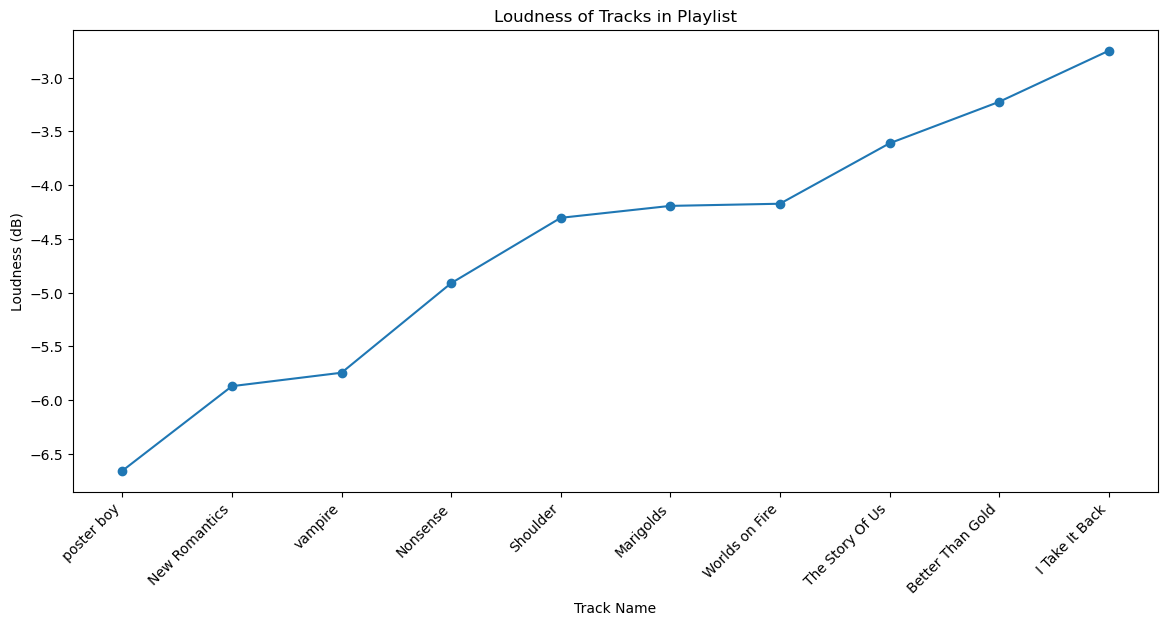

In [6]:
import matplotlib.pyplot as plt

# Obtain the playlist data using the get_playlist_data function
playlist_df = get_playlist_data(playlist_id)

# Sort the DataFrame by loudness in ascending order
sorted_playlist = playlist_df.sort_values(by='loudness')

# Specify size
plt.figure(figsize=(14, 6))

# Create a line plot of loudness values
plt.plot(sorted_playlist['loudness'], marker='o', linestyle='-') # o, shape of marker, - line connecting 

# title
plt.title('Loudness of Tracks in Playlist')

# Label the x-axis with track names
plt.xlabel('Track Name')

# Label the y-axis with loudness from playlist 
plt.ylabel('Loudness (dB)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


playlist id7MIOJj0OW0dT9gK4Ph4HBy
counter at 0


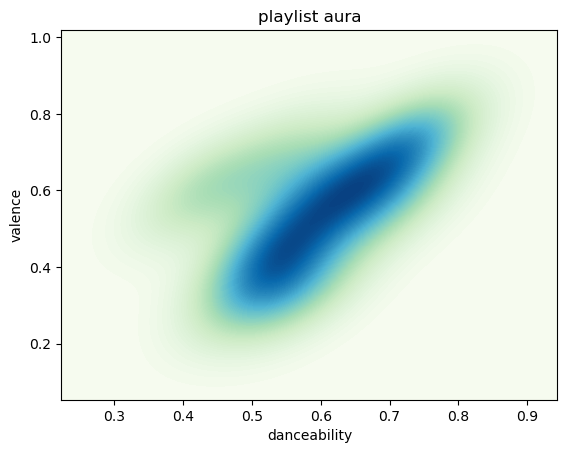

In [7]:
import seaborn as sns
# import pandas as pd
# import numpy as np

def visualize_data(df, x, y, cmap, weights):
    """
    Given a dataframe and the coordinates to be mapped onto the kernel density estimate (KDE) plot, generate a KDE
    plot to become the playlist art.
    """
    sns.kdeplot(data=df, x=x, y=y, cmap=cmap,
            weights=weights, thresh=0, levels=100, fill=True
            )
    
    # Optionally, customize the plot with titles, labels, etc.
    plt.title('playlist aura')
    plt.xlabel(x)
    plt.ylabel(y)
    
    plt.show()

playlist_df = get_playlist_data(playlist_id)
    
visualize_data(playlist_df, "danceability", "valence", "GnBu", "loudness")

In [2]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from matplotlib.colors import ListedColormap

# # Define a list of colors for the custom colormap
# # colors = ["#008770", "#E2C5C5", "#E94C42", "#FDD9D5", "#AFCFCC", "#FC9F9D"]  # blue, green, yellow, red

# # Create a colormap object based on a list of colors
# # cmap = ListedColormap(colors)

# playlist_df = get_playlist_data(playlist_id)

# sns.kdeplot(data=playlist_df, x="danceability", y="valence", cmap="GnBu",
#             weights="loudness", thresh=0, levels=100, fill=True
#             )

# # sns.kdeplot(data=data, x='x_variable', y='y_variable')

# # Optionally, you can add a colorbar to show the density scale
# # plt.colorbar()

# # Optionally, customize the plot with titles, labels, etc.
# plt.title('playlist aura')
# plt.xlabel('Danceability')
# plt.ylabel('Valence')

# plt.show()



NameError: name 'colors' is not defined